In [1]:
dataset='heart.csv'

In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv(dataset)
dataset.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
pip install xgboost

In [3]:
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Data Visualization

In [5]:
df= dataset.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df

Age  ChestPainType   RestingBP  Cholesterol  FastingBS  RestingECG  \
Sex                                                                             
F    52.492228            193  132.212435   241.196891         26         193   
M    53.782069            725  132.445517   187.513103        188         725   

          MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
Sex                                                                
F    146.139896             193  0.668912       193            50  
M    134.325517             725  0.945517       725           458

In [6]:
from plotly import express
express.bar(data_frame=df, barmode='group', title = "Gender wise Analysis",template="seaborn")

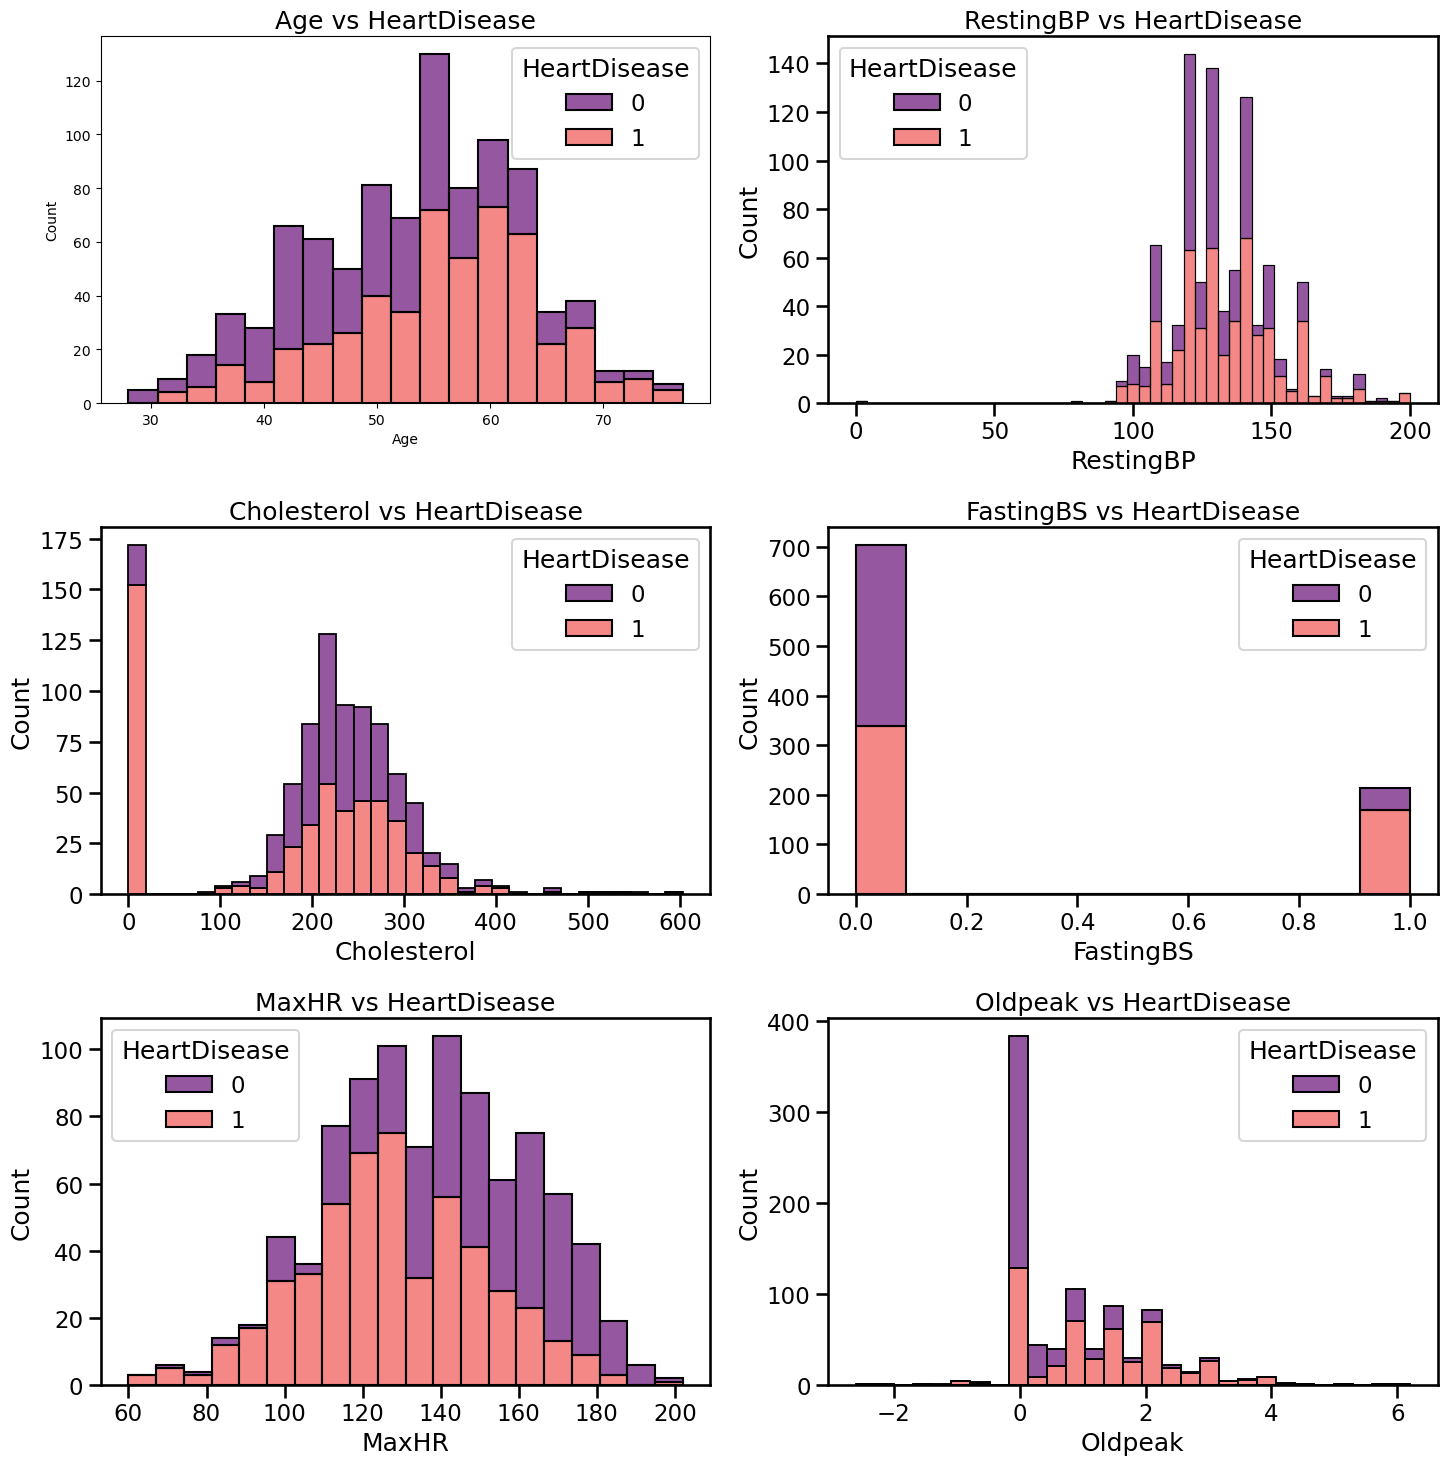

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=dataset, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

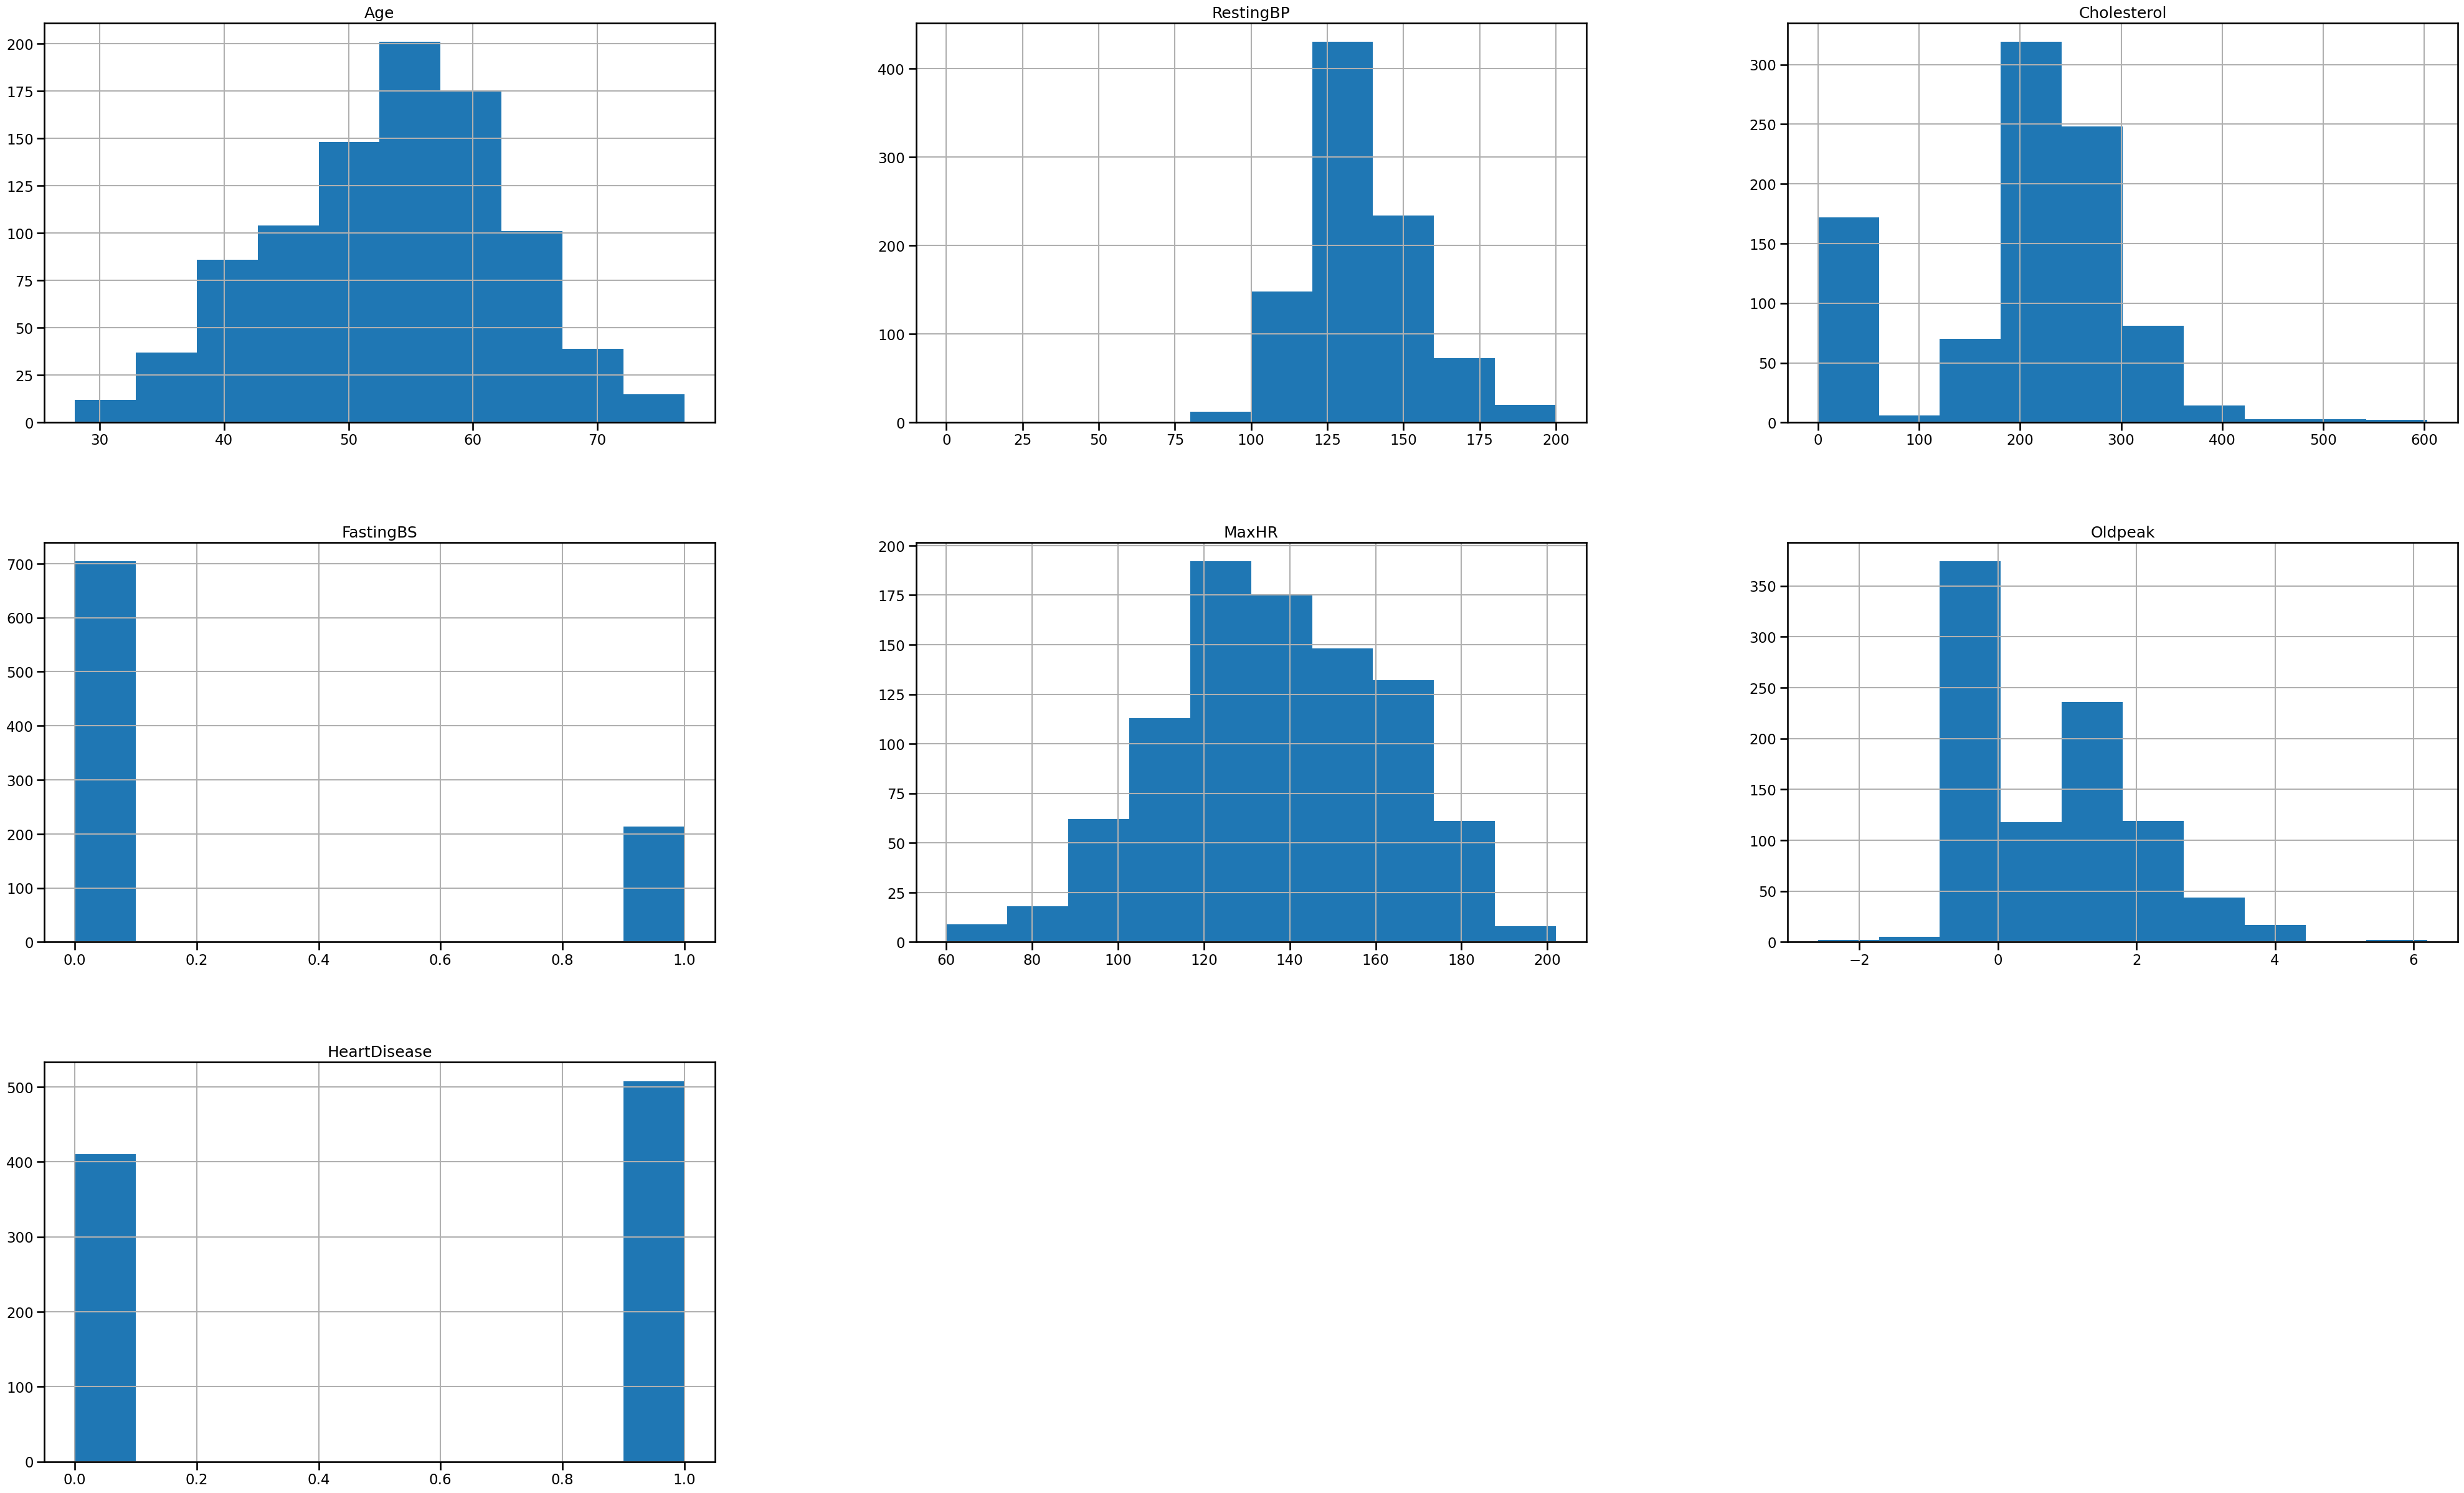

In [9]:
import pandas as pd
from matplotlib import pyplot
dataset.hist()
pyplot.rcParams['figure.figsize'] = [50,30];
pyplot.show()

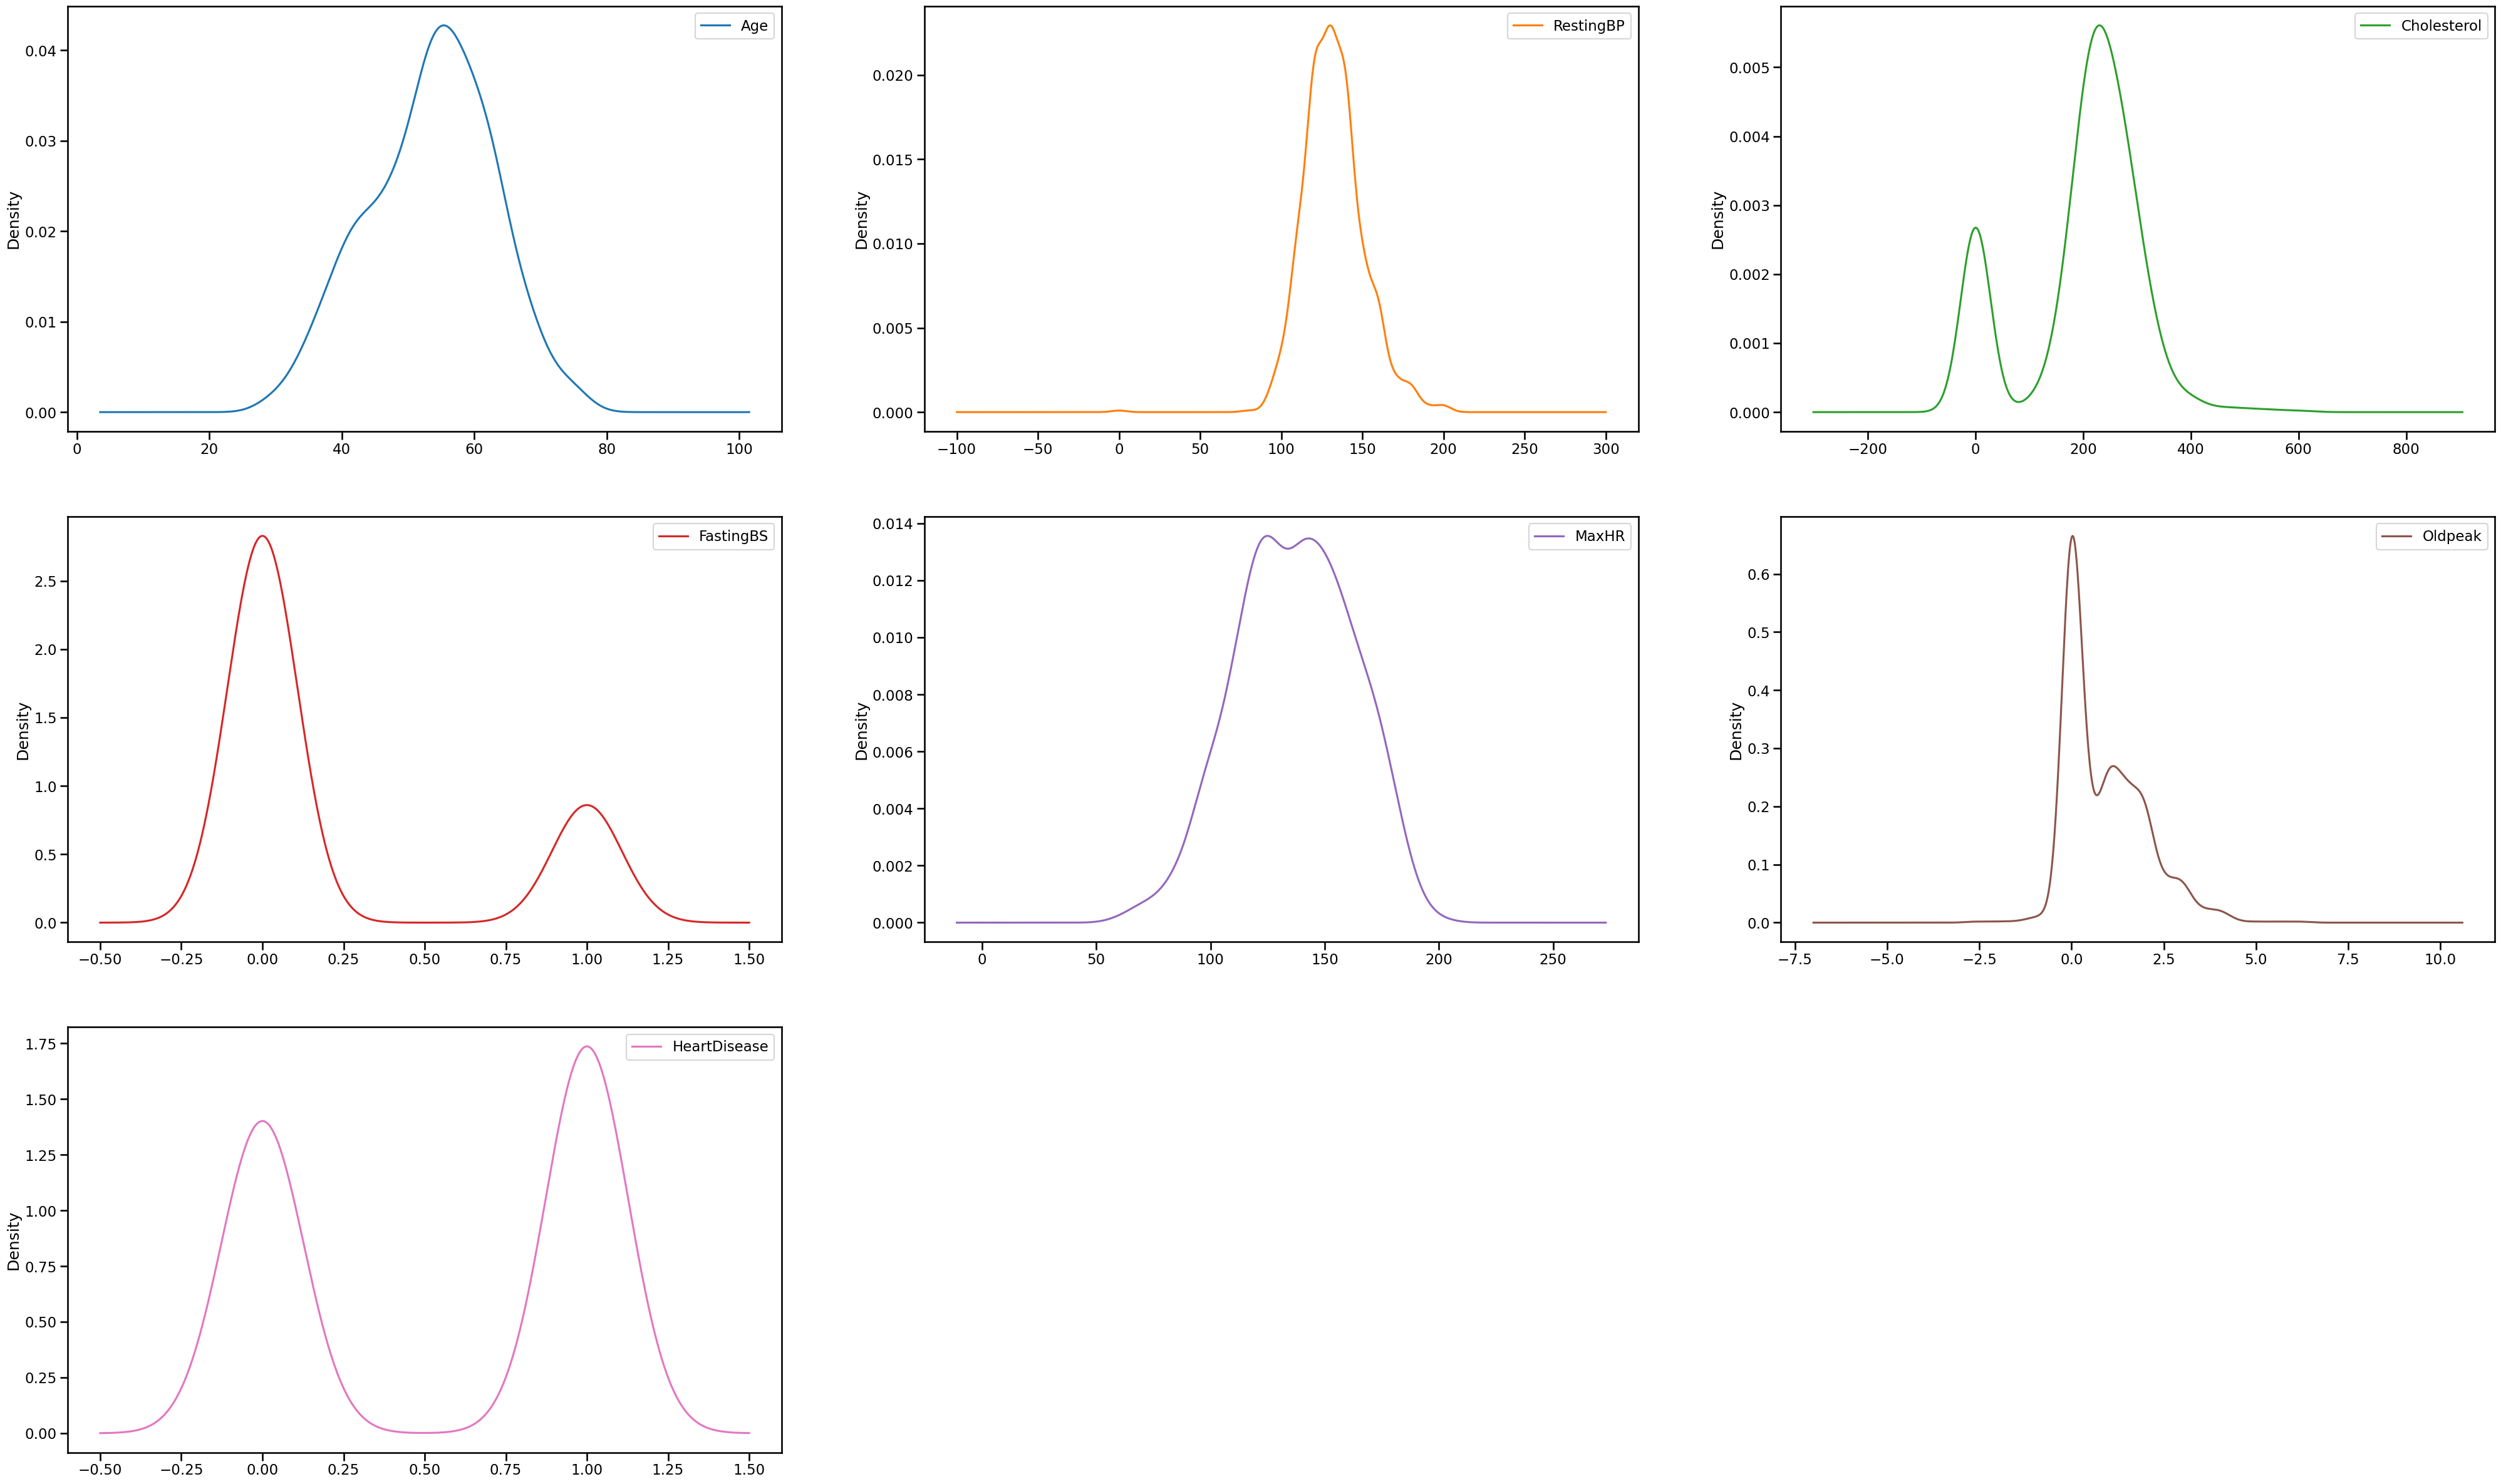

In [10]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.rcParams['figure.figsize'] = [20, 30];
pyplot.show()

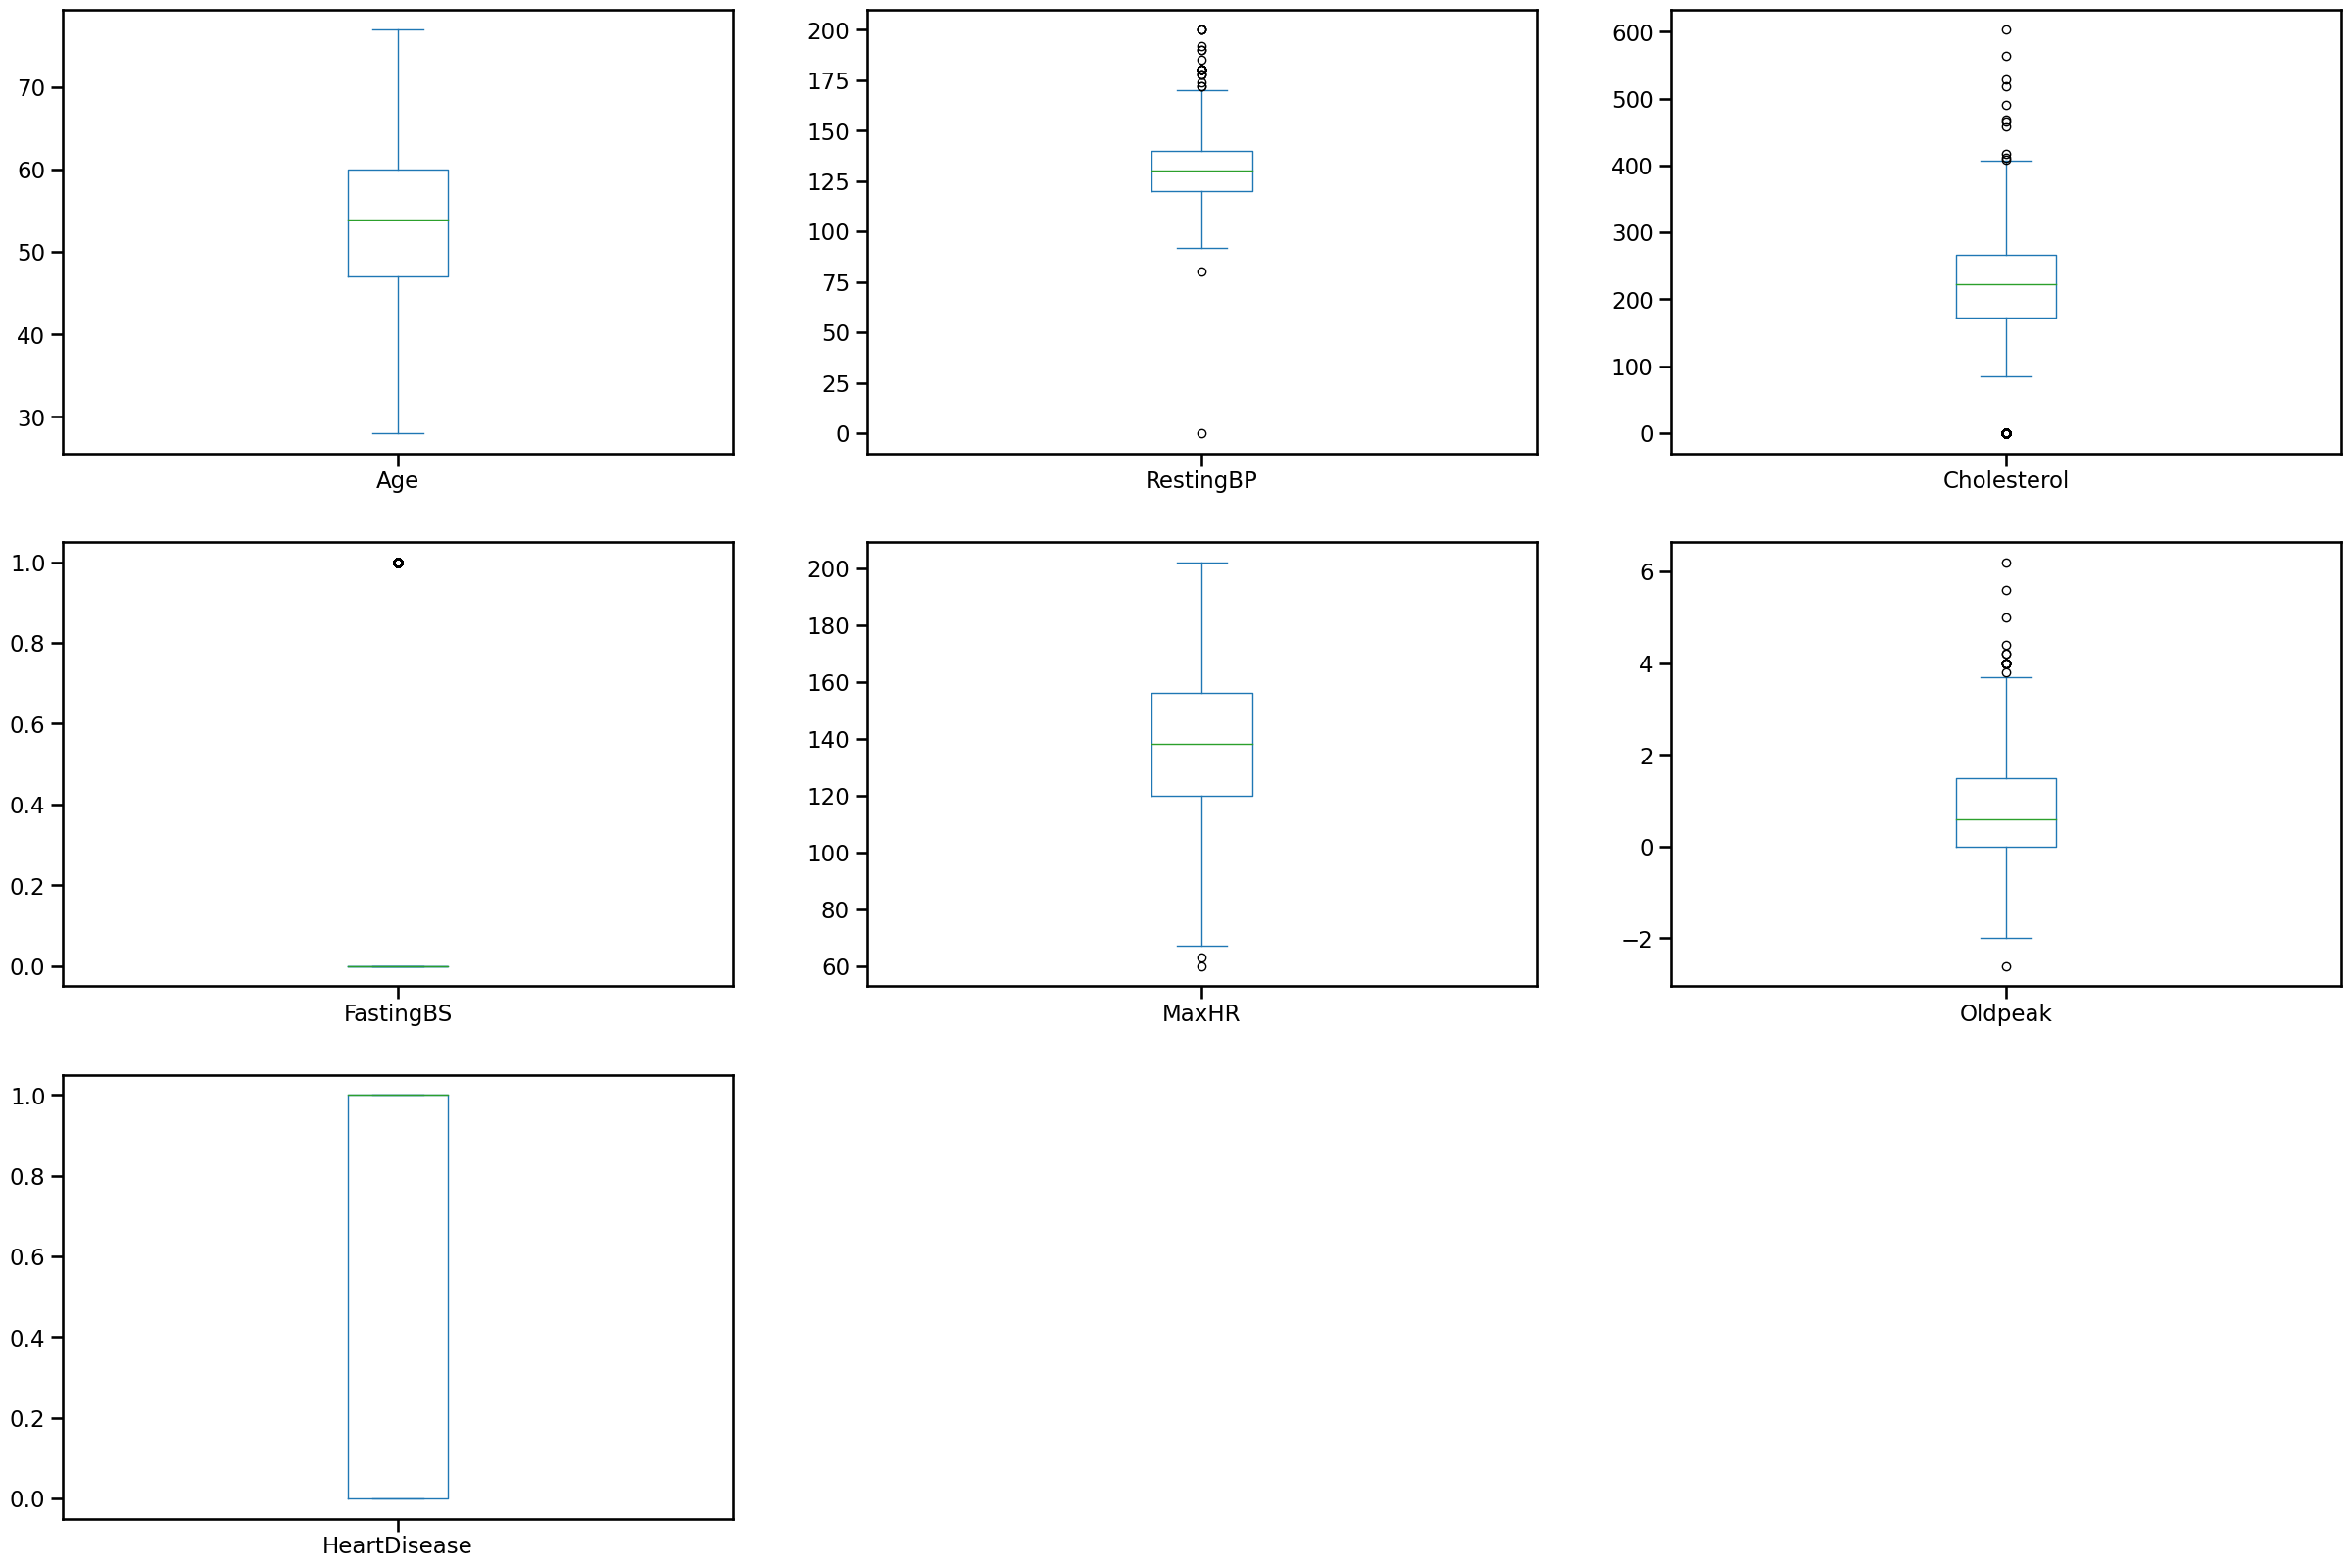

In [12]:
dataset.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.rcParams['figure.figsize'] = [30, 20];
pyplot.show()

In [13]:
correlations = dataset.corr(method = 'pearson')
correlations

C:\Users\harsh\AppData\Local\Temp\ipykernel_19616\1624693843.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

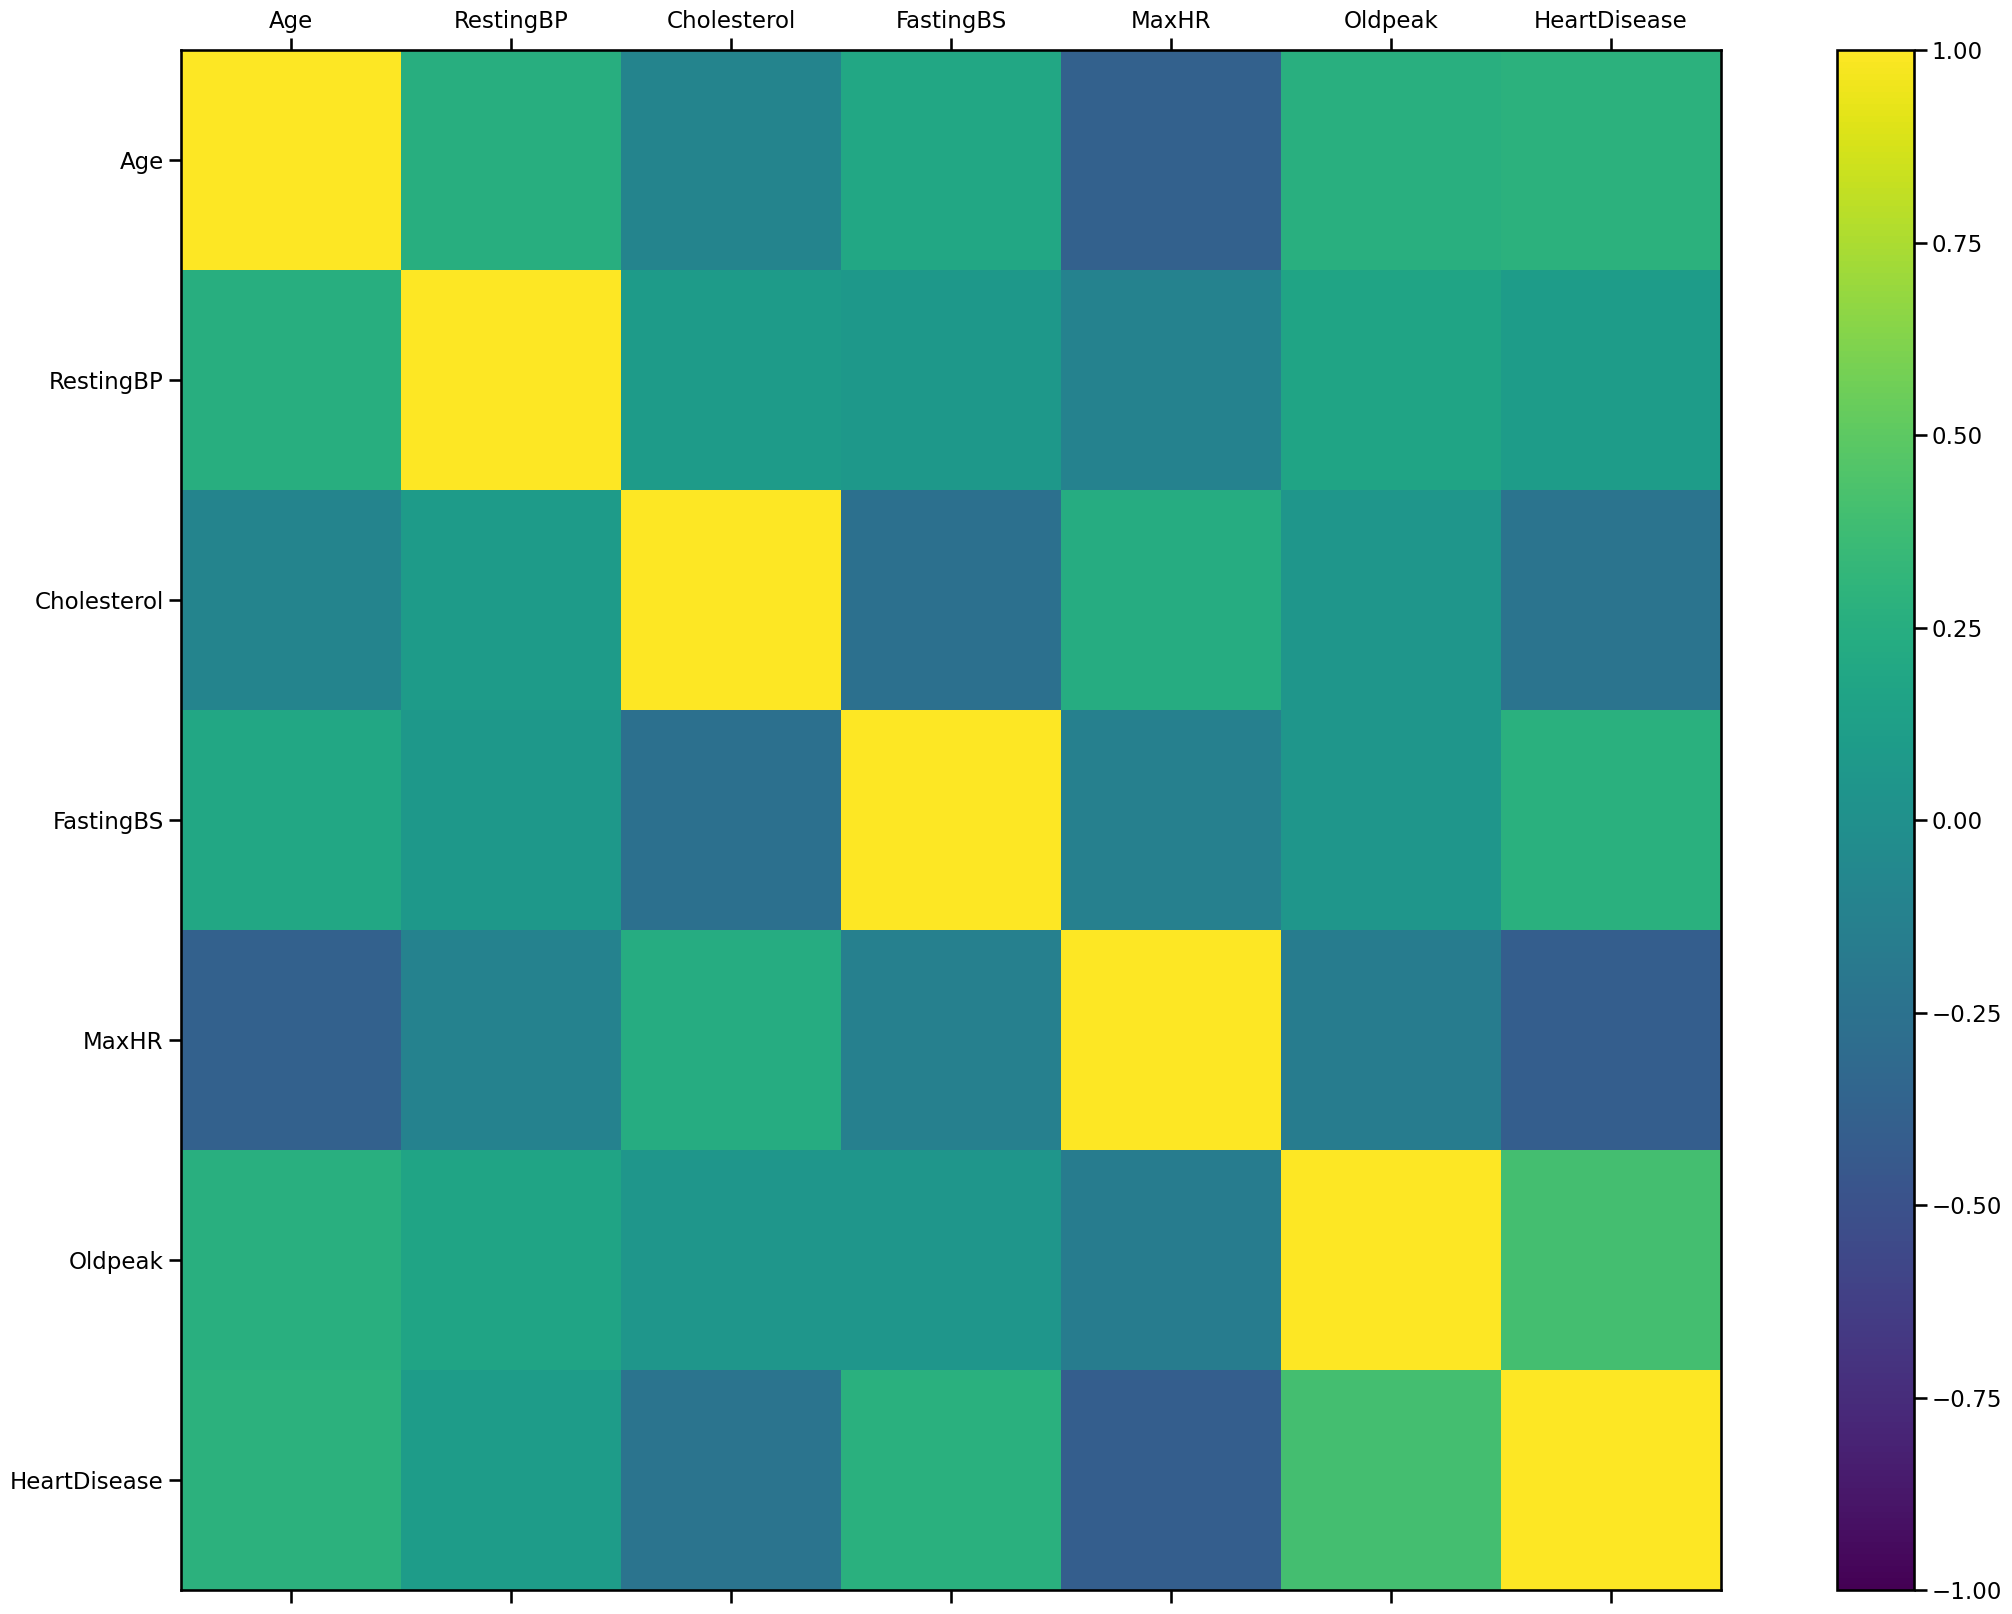

In [14]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
columnnames = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']
ax.set_xticklabels(columnnames)
ax.set_yticklabels(columnnames)
pyplot.rcParams['figure.figsize'] = [12, 12];
pyplot.show()

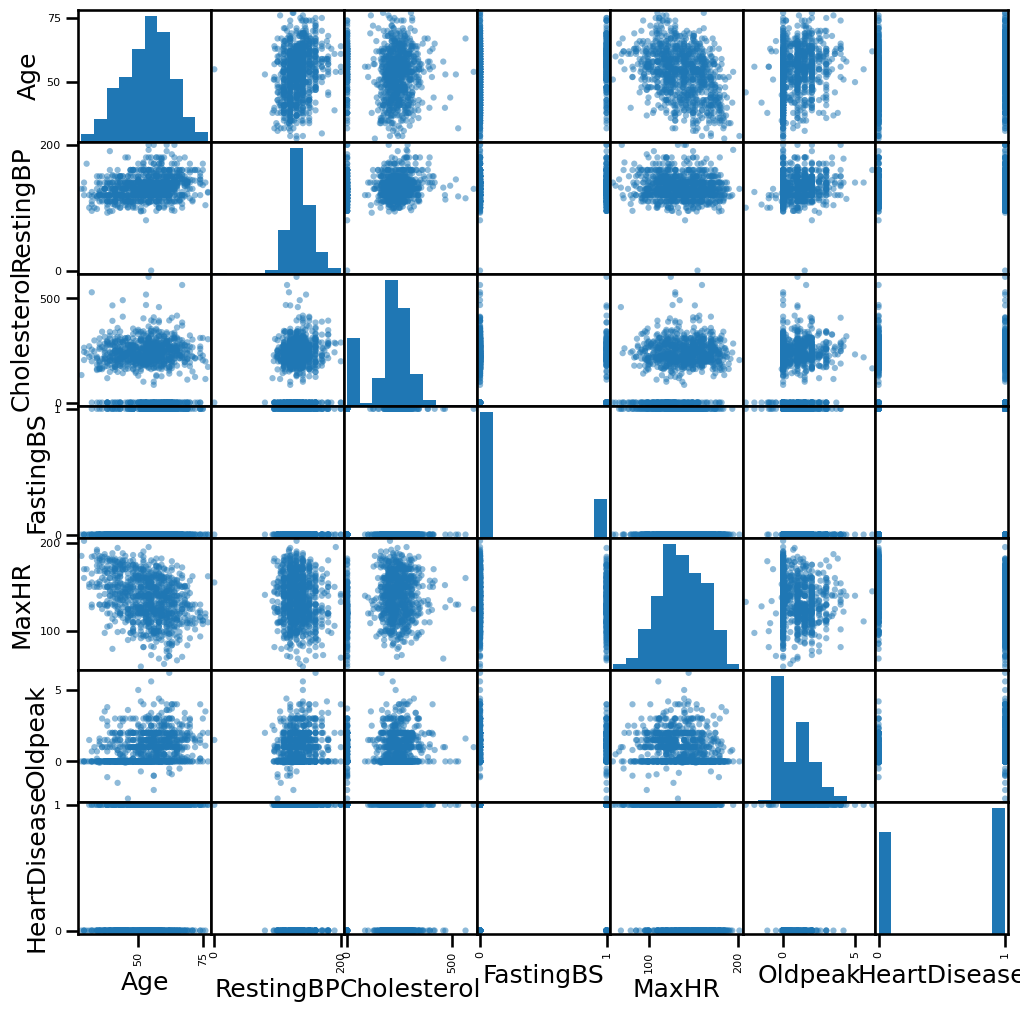

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
pyplot.rcParams['figure.figsize'] = [12, 12]
pyplot.show()

# Data Preprocessing

In [17]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
numerical_cols = []
for col in dataset.columns:
    if dataset[col].dtype in [np.float64, np.int64]:
        numerical_cols.append(col)

z_scores = np.abs((dataset[numerical_cols] - dataset[numerical_cols].mean()) / dataset[numerical_cols].std())

threshold = 3
dataset = dataset[(z_scores < threshold).all(axis=1)]

dataset.to_csv('cleaned_dataset.csv', index=False)

In [5]:
cleaned_dataset=pd.read_csv('cleaned_dataset.csv')
cleaned_dataset.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = []
for col in cleaned_dataset.columns:
    if cleaned_dataset[col].dtype == 'object':
        categorical_cols.append(col)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(cleaned_dataset[categorical_cols])

encoded_cols = encoded_cols.astype(int)

encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
cleaned_dataset = pd.concat([cleaned_dataset, encoded_cols_df], axis=1)

cleaned_dataset = cleaned_dataset.drop(columns=categorical_cols)

cleaned_dataset.to_csv('encoded_dataset.csv', index=False)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
encoded_dataset=pd.read_csv('encoded_dataset.csv')
encoded_dataset.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_dataset = pd.DataFrame(scaler.fit_transform(encoded_dataset), columns=encoded_dataset.columns)

In [9]:
scaled_dataset.head(5)

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.428154   0.465900     0.849636  -0.550362  1.384320 -0.855469   
1 -0.475855   1.634714    -0.168122  -0.550362  0.752973  0.137516   
2 -1.745588  -0.118507     0.793612  -0.550362 -1.535661 -0.855469   
3 -0.581666   0.349019     0.149344  -0.550362 -1.141069  0.634008   
4  0.053200   1.050307    -0.028064  -0.550362 -0.588640 -0.855469   

   HeartDisease     Sex_F     Sex_M  ChestPainType_ASY  ...  \
0     -1.099475 -0.515943  0.515943          -1.077524  ...   
1      0.909525  1.938199 -1.938199          -1.077524  ...   
2     -1.099475 -0.515943  0.515943          -1.077524  ...   
3      0.909525  1.938199 -1.938199           0.928054  ...   
4     -1.099475 -0.515943  0.515943          -1.077524  ...   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0          -0.534905          -0.22955       -0.503821           0.809702   
1           1.869492          -0.22955       -0.503821           0.809702   
2          -0.534905          -0.22955       -0.503821          -1.235023   
3          -0.534905          -0.22955       -0.503821           0.809702   
4           1.869492          -0.22955       -0.503821           0.809702   

   RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
0      -0.489898          0.822945         -0.822945      -0.260184   
1      -0.489898          0.822945         -0.822945      -0.260184   
2       2.041241          0.822945         -0.822945      -0.260184   
3      -0.489898         -1.215148          1.215148      -0.260184   
4      -0.489898          0.822945         -0.822945      -0.260184   

   ST_Slope_Flat  ST_Slope_Up  
0      -0.998888     1.134695  
1       1.001113    -0.881294  
2      -0.998888     1.134695  
3       1.001113    -0.881294  
4      -0.998888     1.134695  

[5 rows x 21 columns]

# Feature Selection

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

scaled_dataset['HeartDisease'] = (scaled_dataset['HeartDisease'] > 0).astype(int)

X = scaled_dataset.drop('HeartDisease', axis=1)
y = scaled_dataset['HeartDisease']
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
selected_dataset = scaled_dataset[selected_features.append(pd.Index(['HeartDisease']))]

In [11]:
print('Ranking of features:', fit.ranking_)

print('Selected features:', selected_features)

print(("Num Features: %d") % fit.n_features_)

Ranking of features: [ 1  8  1  1  5  1  1  1  1  3  4  7  6 11 10  1  2  9  1  1]
Selected features: Index(['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat',
       'ST_Slope_Up'],
      dtype='object')
Num Features: 10


In [12]:
selected_dataset.head(5)

Age  Cholesterol  FastingBS   Oldpeak     Sex_F     Sex_M  \
0 -1.428154     0.849636  -0.550362 -0.855469 -0.515943  0.515943   
1 -0.475855    -0.168122  -0.550362  0.137516  1.938199 -1.938199   
2 -1.745588     0.793612  -0.550362 -0.855469 -0.515943  0.515943   
3 -0.581666     0.149344  -0.550362  0.634008  1.938199 -1.938199   
4  0.053200    -0.028064  -0.550362 -0.855469 -0.515943  0.515943   

   ChestPainType_ASY  ExerciseAngina_N  ST_Slope_Flat  ST_Slope_Up  \
0          -1.077524          0.822945      -0.998888     1.134695   
1          -1.077524          0.822945       1.001113    -0.881294   
2          -1.077524          0.822945      -0.998888     1.134695   
3           0.928054         -1.215148       1.001113    -0.881294   
4          -1.077524          0.822945      -0.998888     1.134695   

   HeartDisease  
0             0  
1             1  
2             0  
3             1  
4             0

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_dataset.drop('HeartDisease', axis=1), selected_dataset['HeartDisease'], test_size=0.2, random_state=42)

# Performance Metrics & Predictions

## AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.02, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=100, random_state=42)

AdaBoost Confusion Matrix:
 [[68 18]
 [ 7 87]]


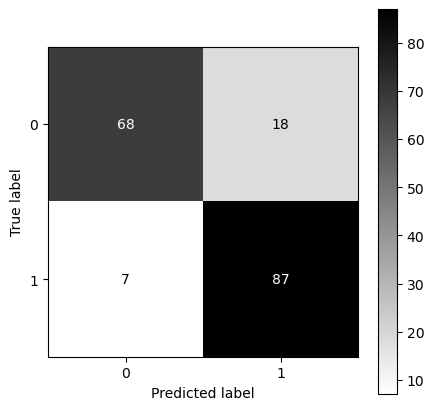

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot

y_pred = adaboost.predict(X_test)
print("AdaBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fig, ax = pyplot.subplots(figsize=(5, 5))
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
display.plot(cmap="binary", ax=ax)
ax.grid(False)
pyplot.show()

In [16]:
from sklearn.metrics import classification_report
predict= adaboost.predict(X_test)
report = classification_report(y_test, predict)
print("AdaBoost Classification Report:\n\n", report)

AdaBoost Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.79      0.84        86
           1       0.83      0.93      0.87        94

    accuracy                           0.86       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.86      0.86       180



In [17]:
y_pred_train_adaboost = adaboost.predict(X_train)
y_pred_test_adaboost = adaboost.predict(X_test)
accuracy_train_adaboost = accuracy_score(y_train, y_pred_train_adaboost)
accuracy_test_adaboost = accuracy_score(y_test, y_pred_test_adaboost)
print("AdaBoost: Training Accuracy = {:.2f}%, Testing Accuracy = {:.2f}%".format(accuracy_train_adaboost*100, accuracy_test_adaboost*100))

AdaBoost: Training Accuracy = 85.40%, Testing Accuracy = 86.11%


## GradientBoost

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, random_state=42)
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.03, random_state=42)

GradientBoost Confusion Matrix:
 [[69 17]
 [ 6 88]]


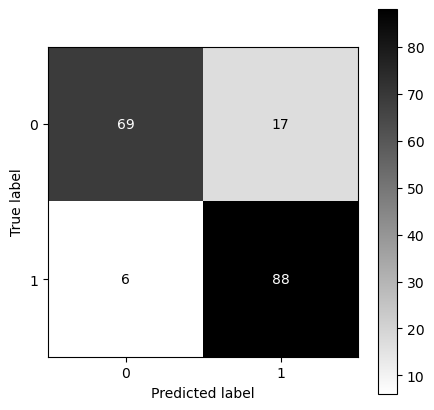

In [19]:
y_pred = gradient_boost.predict(X_test)
print("GradientBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fig, ax = pyplot.subplots(figsize=(5, 5))
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
display.plot(cmap="binary", ax=ax)
ax.grid(False)
pyplot.show()

In [20]:
from sklearn.metrics import classification_report
predict= gradient_boost.predict(X_test)
report = classification_report(y_test, predict)
print("GradientBoost Classification Report:\n\n", report)

GradientBoost Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.80      0.86        86
           1       0.84      0.94      0.88        94

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180



In [21]:
y_pred_train_gradientboost = gradient_boost.predict(X_train)
y_pred_test_gradientboost = gradient_boost.predict(X_test)
accuracy_train_gradientboost = accuracy_score(y_train, y_pred_train_gradientboost)
accuracy_test_gradientboost = accuracy_score(y_test, y_pred_test_gradientboost)
print("GradientBoost: Training Accuracy = {:.2f}%, Testing Accuracy = {:.2f}%".format(accuracy_train_gradientboost*100, accuracy_test_gradientboost*100))

GradientBoost: Training Accuracy = 90.13%, Testing Accuracy = 87.22%


## XGBoost 

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.04, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

XGBoost Confusion Matrix:
 [[71 15]
 [ 5 89]]


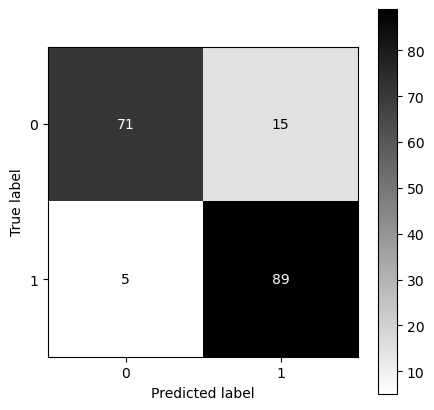

In [23]:
y_pred = xgb.predict(X_test)
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

fig, ax = pyplot.subplots(figsize=(5, 5))
display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
display.plot(cmap="binary", ax=ax)
ax.grid(False)
pyplot.show()

In [24]:
from sklearn.metrics import classification_report
predict= xgb.predict(X_test)
report = classification_report(y_test, predict)
print("XGBoost Classification Report:\n\n", report)

XGBoost Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.83      0.88        86
           1       0.86      0.95      0.90        94

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



In [25]:
y_pred_train_xgboost = xgb.predict(X_train)
y_pred_test_xgboost = xgb.predict(X_test)
accuracy_train_xgboost = accuracy_score(y_train, y_pred_train_xgboost)
accuracy_test_xgboost = accuracy_score(y_test, y_pred_test_xgboost)
print("XGBoost: Training Accuracy = {:.2f}%, Testing Accuracy = {:.2f}%".format(accuracy_train_xgboost*100, accuracy_test_xgboost*100))

XGBoost: Training Accuracy = 94.58%, Testing Accuracy = 88.89%


# Comparision of Models

In [26]:
adaboost_score = adaboost.score(X_test, y_test)
gradient_boost_score = gradient_boost.score(X_test, y_test)
xgb_score = xgb.score(X_test, y_test)

In [27]:
print('AdaBoost accuracy:', adaboost_score*100)

print('GradientBoost accuracy:', gradient_boost_score*100)

print('XGBoost accuracy:', xgb_score*100)

AdaBoost accuracy: 86.11111111111111
GradientBoost accuracy: 87.22222222222223
XGBoost accuracy: 88.88888888888889


In [28]:
import joblib
joblib.dump(xgb,'xgb_model.joblib')
joblib.dump(adaboost,'adaboost_model.joblib')
joblib.dump(gradient_boost,'gradient_boost.joblib')

['gradient_boost.joblib']

In [29]:
import tkinter as tk
import joblib
import numpy as np

# Load the trained machine learning model
model1 = joblib.load('adaboost_model.joblib')
model2 = joblib.load('gradient_boost.joblib')
model3 = joblib.load('xgb_model.joblib')

# Create a Tkinter window
window = tk.Tk()
window.title('CVD Prediction')

''

In [106]:
import tkinter as tk
import joblib
# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')
# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4,10):
            if feature_entries[i].get()=='Yes':
                feature_values.append(1)
            else:
                feature_values.append(0)
        else:
            feature_value = float(feature_entries[i].get())
            feature_values.append(feature_value)

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 ==1:
        output1="Possible occurrence of Cardiovascular Disease"
    else:
        output1="Possibly not developing Cardiovascular Disease"
    # Display the predicted output
    #output_label.config(text="Adaboost Model: " + str(output1))
    
    
    output2 = gradient_boost.predict([feature_values])
    if output2==1:
        output2="Possible occurrence of Cardiovascular Disease"
    else:
        output2="Possibly not developing Cardiovascular Disease"
        

    # Display the predicted output
    output_label.config(text="Adaboost Model          : " + str(output1)+"\nGradient boost Model : " + str(output2)+"\nXgboost Model             : " + str(output1))
    
# Create a tkinter window
window = tk.Tk()

window.title("CVD Prediction")

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(window, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0)

    feature_entry = tk.Entry(window)
    feature_entry.grid(row=i, column=1)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(window, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1)

# Create a label to display the predicted output
output_label = tk.Label(window, text="")
output_label.grid(row=11, column=1)
window.mainloop()

In [1]:
import tkinter as tk
import joblib
#correct code with colors
# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')

# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4,10):
            if feature_entries[i].get()=='Yes':
                feature_values.append(1)
            else:
                feature_values.append(0)
        else:
            feature_value = float(feature_entries[i].get())
            feature_values.append(feature_value)

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 ==1:
        output1="Possible occurrence of Cardiovascular Disease"
    else:
        output1="Possibly not developing Cardiovascular Disease"
    # Display the predicted output
    #output_label.config(text="Adaboost Model: " + str(output1))
    
    
    output2 = gradient_boost.predict([feature_values])
    if output2==1:
        output2="Possible occurrence of Cardiovascular Disease"
    else:
        output2="Possibly not developing Cardiovascular Disease"
        

    # Display the predicted output
    output_label.config(text="Adaboost Model          : " + str(output2)+"\nGradient boost Model : " + str(output2)+"\nXgboost Model             : " + str(output2))
    
# Create a tkinter window
window = tk.Tk()
window.title("CVD Prediction")

# Create a frame to center align the labels, input fields, and output label
frame = tk.Frame(window)
frame.pack(expand=True, padx=20, pady=20)
bg_colors = ['#FFC0CB', '#FFD700', '#7FFFD4', '#B0E0E6', '#90EE90', '#FFA07A', '#87CEFA', '#ADD8E6', '#F08080', '#E0FFFF']

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(frame, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0, sticky="w")

    feature_entry = tk.Entry(frame, bg=bg_colors[i])
    feature_entry.grid(row=i, column=1, padx=10, pady=5)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(frame, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1, pady=10)

# Create a label to display the predicted output
output_label = tk.Label(frame, text="")
output_label.grid(row=11, column=1, pady=10)
output_label.config(bg='#F0E68C')
# Center the window on the screen
window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth() // 2) - (width // 2)
y = (window.winfo_screenheight() // 2) - (height // 2)
window.geometry('{}x{}+{}+{}'.format(width, height, x, y))

window.mainloop()


In [69]:
dataset.head(1)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0

In [77]:
selected_dataset.head()

Age  Cholesterol  FastingBS   Oldpeak     Sex_F     Sex_M  \
0 -1.428154     0.849636  -0.550362 -0.855469 -0.515943  0.515943   
1 -0.475855    -0.168122  -0.550362  0.137516  1.938199 -1.938199   
2 -1.745588     0.793612  -0.550362 -0.855469 -0.515943  0.515943   
3 -0.581666     0.149344  -0.550362  0.634008  1.938199 -1.938199   
4  0.053200    -0.028064  -0.550362 -0.855469 -0.515943  0.515943   

   ChestPainType_ASY  ExerciseAngina_N  ST_Slope_Flat  ST_Slope_Up  \
0          -1.077524          0.822945      -0.998888     1.134695   
1          -1.077524          0.822945       1.001113    -0.881294   
2          -1.077524          0.822945      -0.998888     1.134695   
3           0.928054         -1.215148       1.001113    -0.881294   
4          -1.077524          0.822945      -0.998888     1.134695   

   HeartDisease  
0             0  
1             1  
2             0  
3             1  
4             0

In [71]:
adaboost.predict([[-1.428154,0.849636,-0.550362,-0.855469,-0.515943,0.515943,-1.077524,0.822945,-0.998888,1.134695]])[0]

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



0

In [74]:
import pickle
with open('heart.pkl','wb') as f:
    pickle.dump(adaboost,f)

In [75]:
selected_dataset['HeartDisease'].value_counts()

1    492
0    407
Name: HeartDisease, dtype: int64

In [76]:
adaboost_model=pickle.load(open('heart.pkl','rb'))

adaboost_model.predict([[-1.428154,0.849636,-0.550362,-0.855469,-0.515943,0.515943,-1.077524,0.822945,-0.998888,1.134695]])[0]

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names



0

In [7]:
import tkinter as tk
import joblib
#correct code with colors
# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')

# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4,10):
            if feature_entries[i].get()=='Yes':
                feature_values.append(1)
            else:
                feature_values.append(0)
        else:
            feature_value = float(feature_entries[i].get())
            feature_values.append(feature_value)

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 ==1:
        output1="Possible occurrence of Cardiovascular Disease"
    else:
        output1="Possibly not developing Cardiovascular Disease"
    # Display the predicted output
    #output_label.config(text="Adaboost Model: " + str(output1))
    
    
    output2 = gradient_boost.predict([feature_values])
    if output2==1:
        output2="Possible occurrence of Cardiovascular Disease"
    else:
        output2="Possibly not developing Cardiovascular Disease"
        

    # Display the predicted output
    output_label.config(text="Adaboost Model          : " + str(output2)+"\nGradient boost Model : " + str(output2)+"\nXgboost Model             : " + str(output2))
    
# Create a tkinter window
window = tk.Tk()
window.title("CVD Prediction")

# Add title label at the center top
title_label = tk.Label(window, text="Cardiovascular Disease Prediction", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# Create a frame to center align the labels, input fields, and output label
frame = tk.Frame(window)
frame.pack(expand=True, padx=20, pady=20)
bg_colors = ['#FFC0CB', '#FFD700', '#7FFFD4', '#B0E0E6', '#90EE90', '#FFA07A', '#87CEFA', '#ADD8E6', '#F08080', '#E0FFFF']

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(frame, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0, sticky="w")

    feature_entry = tk.Entry(frame, bg=bg_colors[i])
    feature_entry.grid(row=i, column=1, padx=10, pady=12)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(frame, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1, pady=10)

# Create a label to display the predicted output
output_label = tk.Label(frame, text="")
output_label.grid(row=11, column=1, pady=10)
output_label.config(bg='#F0E68C')
# Center the window on the screen
window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth() // 2) - (width // 2)
y = (window.winfo_screenheight() // 2) - (height // 2)
window.geometry('{}x{}+{}+{}'.format(width, height, x, y))

window.mainloop()


In [16]:
import tkinter as tk
import joblib

# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')

# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4, 10):
            if feature_entries[i].get() == 'Yes':
                feature_values.append(1)
            else:
                feature_values.append(0)
        else:
            feature_value = feature_entries[i].get()
            if not feature_value:
                output_label.config(text="Enter complete details")
                return
            feature_values.append(float(feature_value))

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 == 1:
        output1 = "Possible occurrence of Cardiovascular Disease"
    else:
        output1 = "Possibly not developing Cardiovascular Disease"

    output2 = gradient_boost.predict([feature_values])
    if output2 == 1:
        output2 = "Possible occurrence of Cardiovascular Disease"
    else:
        output2 = "Possibly not developing Cardiovascular Disease"

    # Display the predicted output
    output_label.config(
        text="Adaboost Model          : " + str(output1) + "\nGradient boost Model : " + str(output2) + "\nXgboost Model             : " + str(output2)
    )

# Create a tkinter window
window = tk.Tk()
window.title("CVD Prediction")

# Add title label at the center top
title_label = tk.Label(window, text="Cardiovascular Disease Prediction", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# Create a frame to center align the labels, input fields, and output label
frame = tk.Frame(window)
frame.pack(expand=True, padx=20, pady=20)
bg_colors = ['#FFC0CB', '#FFD700', '#7FFFD4', '#B0E0E6', '#90EE90', '#FFA07A', '#87CEFA', '#ADD8E6', '#F08080', '#E0FFFF']

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(frame, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0, sticky="w")

    feature_entry = tk.Entry(frame, bg=bg_colors[i])
    feature_entry.grid(row=i, column=1, padx=10, pady=12)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(frame, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1, pady=10)

# Create a label to display the predicted output
output_label = tk.Label(frame, text="")
output_label.grid(row=11, column=1, pady=10)
output_label.config(bg='#F0E68C')
# Center the window on the screen
window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth() // 2) - (width // 2)
y = (window.winfo_screenheight() // 2) - (height // 2)
window.geometry('{}x{}+{}+{}'.format(width, height, x, y))

window.mainloop()

In [43]:
import tkinter as tk
from PIL import Image, ImageTk
import joblib

# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')

# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4, 10):
            if feature_entries[i].get() == 'Yes':
                feature_values.append(1)
            else:
                feature_values.append(0)
        else:
            feature_value = feature_entries[i].get()
            if not feature_value:
                output_label.config(text="Enter complete details")
                return
            feature_values.append(float(feature_value))

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 == 1:
        output1 = "Possible occurrence of Cardiovascular Disease"
    else:
        output1 = "Possibly not developing Cardiovascular Disease"

    output2 = gradient_boost.predict([feature_values])
    if output2 == 1:
        output2 = "Possible occurrence of Cardiovascular Disease"
    else:
        output2 = "Possibly not developing Cardiovascular Disease"

    # Display the predicted output
    output_label.config(
        text="Adaboost Model          : " + str(output1) + "\nGradient boost Model : " + str(output2) + "\nXgboost Model             : " + str(output2)
    )

# Create a tkinter window
window = tk.Tk()
window.title("CVD Prediction")

# Load and display the image
image = Image.open("heart_pic.png")
image = image.resize((400, 300))  # Resize the image as desired
photo = ImageTk.PhotoImage(image)

# Create a label to display the image
image_label = tk.Label(window, image=photo)
image_label.pack(side="left", padx=40, pady=10)

# Add title label at the center top
title_label = tk.Label(window, text="Cardiovascular Disease Prediction", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# Create a frame to center align the labels, input fields, and output label
frame = tk.Frame(window)
frame.pack(expand=True, padx=20, pady=20)
bg_colors = ['#FFC0CB', '#FFD700', '#7FFFD4', '#B0E0E6', '#90EE90', '#FFA07A', '#87CEFA', '#ADD8E6', '#F08080', '#E0FFFF']

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(frame, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0, sticky="w")

    feature_entry = tk.Entry(frame, bg=bg_colors[i])
    feature_entry.grid(row=i, column=1, padx=10, pady=12)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(frame, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1, pady=10)

# Create a label to display the predicted output
output_label = tk.Label(frame, text="")
output_label.grid(row=11, column=1, pady=10)
output_label.config(bg='#F0E68C')
# Center the window on the screen
window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth() // 2) - (width // 2)
y = (window.winfo_screenheight() // 2) - (height // 2)
window.geometry('{}x{}+{}+{}'.format(width, height, x, y))

window.mainloop()

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
################################################################

In [2]:
import tkinter as tk
from PIL import Image, ImageTk
import joblib

# Load the trained model
adaboost_model = joblib.load('adaboost_model.joblib')
gradient_boost = joblib.load('gradient_boost.joblib')

# Define the feature variable names
feature_names = ['Age', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Flat', 'ST_Slope_Up']

# Define a function to predict the output based on user input
def predict_output():
    # Get the user input values for the 10 feature variables
    feature_values = []
    for i in range(10):
        if i in range(4, 10):
            if feature_entries[i].get() == 'Yes':
                feature_values.append(1)
            elif feature_entries[i].get() == 'No':
                feature_values.append(0)
        else:
            feature_value = feature_entries[i].get()
            if not feature_value:
                output_label.config(text="Enter complete details")
                return
            feature_values.append(float(feature_value))

    # Use the loaded model to predict the output
    output1 = adaboost_model.predict([feature_values])
    if output1 == 1:
        output1 = "Possible occurrence of Cardiovascular Disease"
    else:
        output1 = "Possibly not developing Cardiovascular Disease"

    output2 = gradient_boost.predict([feature_values])
    if output2 == 1:
        output2 = "Possible occurrence of Cardiovascular Disease"
    else:
        output2 = "Possibly not developing Cardiovascular Disease"

    # Display the predicted output
    output_label.config(
        text="Adaboost Model          : " + str(output2) + "\nGradient boost Model : " + str(output2) + "\nXgboost Model             : " + str(output2)
    )

# Create a tkinter window
window = tk.Tk()
window.title("CVD Prediction")

# Load and display the image
image = Image.open("heart_pic.png")
image = image.resize((400, 300))  # Resize the image as desired
photo = ImageTk.PhotoImage(image)

# Create a label to display the image
image_label = tk.Label(window, image=photo)
image_label.pack(side="left", padx=40, pady=10)

# Add title label at the center top
title_label = tk.Label(window, text="Cardiovascular Disease Prediction", font=("Helvetica", 16, "bold"))
title_label.pack(pady=10)

# Create a frame to center align the labels, input fields, and output label
frame = tk.Frame(window)
frame.pack(expand=True, padx=20, pady=20)
bg_colors = ['#FFC0CB', '#FFD700', '#7FFFD4', '#B0E0E6', '#90EE90', '#FFA07A', '#87CEFA', '#ADD8E6', '#F08080', '#E0FFFF']

# Create a label and text entry box for each feature variable
feature_entries = []
for i in range(10):
    feature_label = tk.Label(frame, text=feature_names[i] + ":")
    feature_label.grid(row=i, column=0, sticky="w")

    feature_entry = tk.Entry(frame, bg=bg_colors[i])
    feature_entry.grid(row=i, column=1, padx=10, pady=12)
    feature_entries.append(feature_entry)

# Create a button to predict the output based on user input
predict_button = tk.Button(frame, text="Predict", command=predict_output)
predict_button.grid(row=10, column=1, pady=10)

# Create a label to display the predicted output
output_label = tk.Label(frame, text="")
output_label.grid(row=11, column=1, pady=10)
output_label.config(bg='#F0E68C')
# Center the window on the screen
window.update_idletasks()
width = window.winfo_width()
height = window.winfo_height()
x = (window.winfo_screenwidth() // 2) - (width // 2)
y = (window.winfo_screenheight() // 2) - (height // 2)
window.geometry('{}x{}+{}+{}'.format(width, height, x, y))

window.mainloop()

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\base.py:420: 